#Import libraries and Datasets

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F

#Dataset and DataLoader
#transform pipelinne for MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

#load the training and test datasets
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)



#Check the data

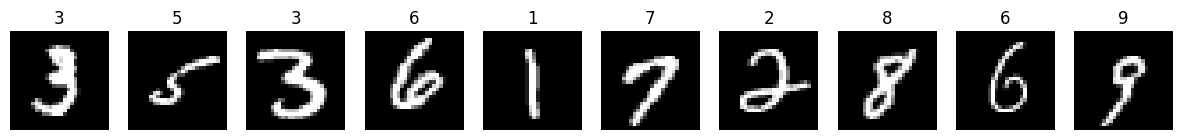

In [16]:

#display some sample images
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 10, figsize=(15, 2))
for i in range(10,20):
    axes[i-10].imshow(train_dataset[i][0].squeeze(), cmap='gray')
    axes[i-10].set_title(train_dataset[i][1])
    axes[i-10].axis('off')



In [22]:
# Get one batch from the DataLoader
images, labels = next(iter(train_loader))

# Print shapes
print(f'Images shape: {images.shape}')
print(f'Labels shape: {labels.shape}')

Images shape: torch.Size([64, 1, 28, 28])
Labels shape: torch.Size([64])


#Define neural network

In [17]:
# define a simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
      super(SimpleCNN, self).__init__()
      self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
      self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
      self.pool=nn.MaxPool2d(2,2)
      self.dropout=nn.Dropout(0.25)
      self.fc1 = nn.Linear(1600, 128) #64*5*5
      self.fc2 = nn.Linear(128, 10)


    def forward(self, x):
      x = self.pool(F.relu(self.conv1(x)))
      x = self.pool(F.relu(self.dropout(self.conv2(x))))
      x = x.view(x.size(0), -1)
      x = F.relu(self.fc1(x))
      x = self.fc2(x)
      return F.softmax(x, dim=1)



#Model Training

In [18]:



# Training function
def train(model,device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print(f'Epoch: {epoch+1}/{epoch}, Batch: {batch_idx+1}/{len(train_loader)}, Loss: {loss.item():.4f}')





#Model Testing

In [19]:
# Testing function
def test(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            accuracy = 100 * correct / total
    print(f'Accuracy of the model on the test set: {accuracy:.2f}%')

#Model initialization

In [21]:
# Initialize the model, loss function, and optimizer

model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

for epoch in range(4):
    train(model, device, train_loader, optimizer, epoch)
    test(model, test_loader)


Epoch: 1/0, Batch: 1/938, Loss: 2.3035
Epoch: 1/0, Batch: 101/938, Loss: 1.6525
Epoch: 1/0, Batch: 201/938, Loss: 1.6710
Epoch: 1/0, Batch: 301/938, Loss: 1.6428
Epoch: 1/0, Batch: 401/938, Loss: 1.5212
Epoch: 1/0, Batch: 501/938, Loss: 1.4702
Epoch: 1/0, Batch: 601/938, Loss: 1.5249
Epoch: 1/0, Batch: 701/938, Loss: 1.4783
Epoch: 1/0, Batch: 801/938, Loss: 1.4944
Epoch: 1/0, Batch: 901/938, Loss: 1.5092
Accuracy of the model on the test set: 97.45%
Epoch: 2/1, Batch: 1/938, Loss: 1.4680
Epoch: 2/1, Batch: 101/938, Loss: 1.4632
Epoch: 2/1, Batch: 201/938, Loss: 1.4657
Epoch: 2/1, Batch: 301/938, Loss: 1.4726
Epoch: 2/1, Batch: 401/938, Loss: 1.4782
Epoch: 2/1, Batch: 501/938, Loss: 1.4903
Epoch: 2/1, Batch: 601/938, Loss: 1.5240
Epoch: 2/1, Batch: 701/938, Loss: 1.4633
Epoch: 2/1, Batch: 801/938, Loss: 1.4771
Epoch: 2/1, Batch: 901/938, Loss: 1.4736
Accuracy of the model on the test set: 98.23%
Epoch: 3/2, Batch: 1/938, Loss: 1.4954
Epoch: 3/2, Batch: 101/938, Loss: 1.4665
Epoch: 3/2, 

#Save and Load

In [23]:
torch.save(model.state_dict(), 'simple_cnn.pth')


In [ ]:
model = SimpleCNN()                     # Recreate the model
model.load_state_dict(torch.load('simple_cnn.pth'))  # Load weights
model.to(device)                        # Move to GPU if available
model.eval()                            # Set to evaluation mode

test(model, test_loader)